In [2]:
import pandas as pd
from sklearn import preprocessing
import glob
import os

In [24]:
list_of_test_files = glob.glob("out/out_test*.csv")
list_of_test_files.sort(key=os.path.getmtime)
last_test_file = list_of_test_files[-1]
list_of_train_files = glob.glob("out/out_train*.csv")
list_of_train_files.sort(key=os.path.getmtime)
last_train_file = list_of_train_files[-1]

print(last_test_file)
print(last_train_file)

out/out_test_20200504-092251.csv
out/out_train_20200504-092237.csv


In [25]:
new_data = pd.read_csv(last_test_file, usecols=['city', 'weekofyear', 'total_cases'])
# worst_data = pd.read_csv('out/out20200421-122140.csv', usecols=['total_cases'])
best_data_reg = pd.read_csv('out/out20200325-212033.csv', usecols=['total_cases'])
best_data = pd.read_csv('out/out20200330-235514.csv', usecols=['total_cases'])
# worst_data = pd.read_csv('out/out20200420-170052.csv', usecols=['total_cases'])
train_data = pd.read_csv('dengue_features_train_with_out.csv')
train_data_out = pd.read_csv(last_train_file, usecols=['total_cases'])

In [26]:
new_data['best_data_reg'] = best_data_reg['total_cases'].astype(int)
# new_data['worst_data'] = worst_data['total_cases'].astype(int)
new_data['total_cases'] = new_data['total_cases'].astype(int)

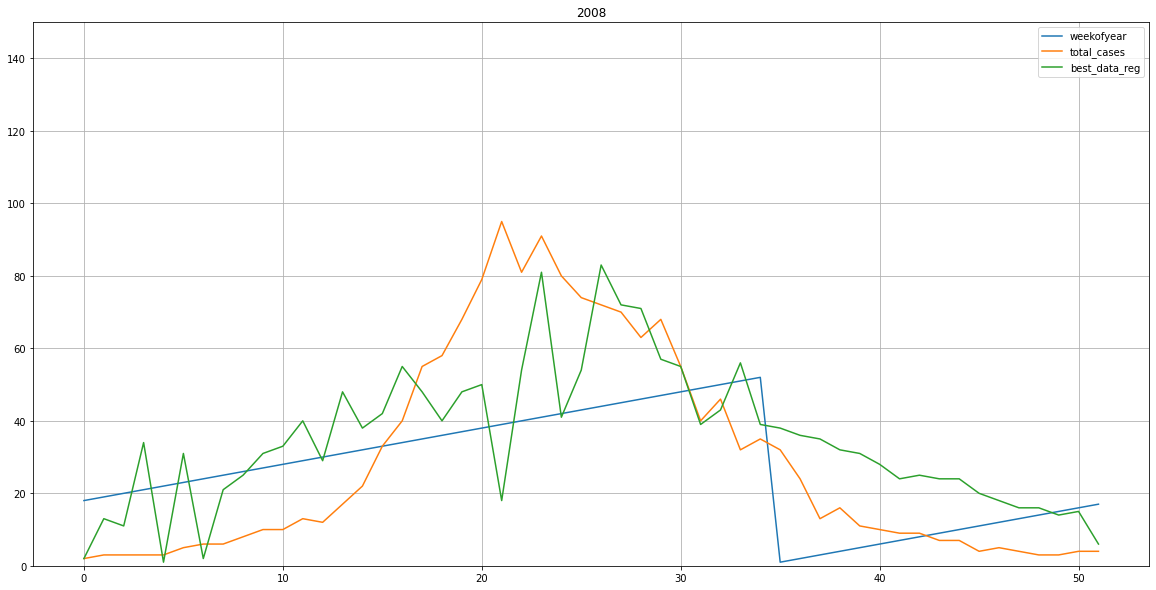

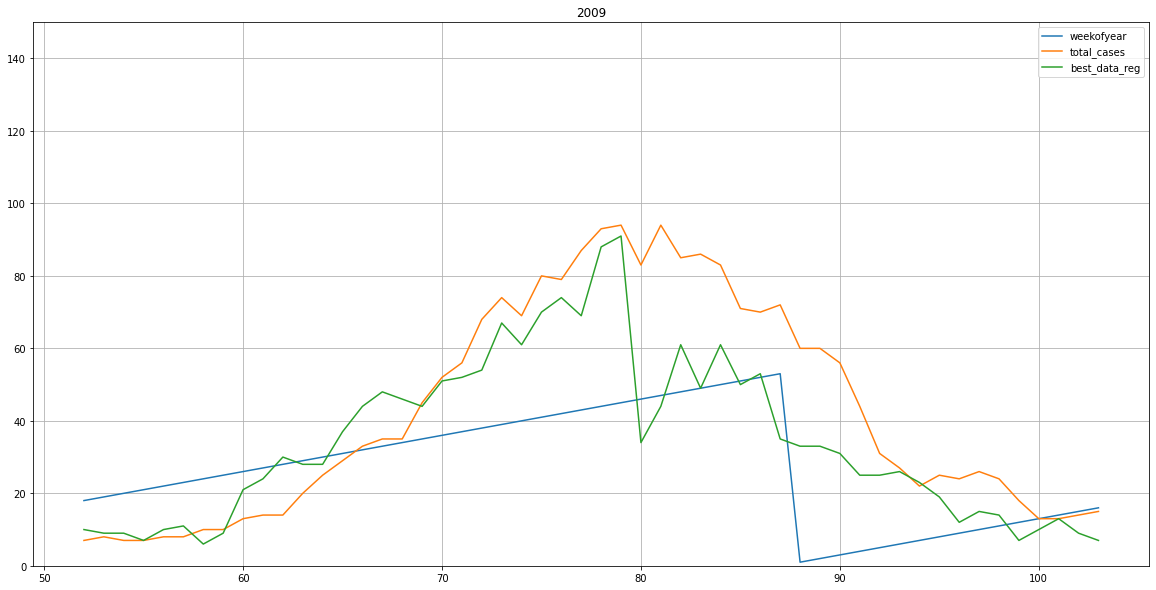

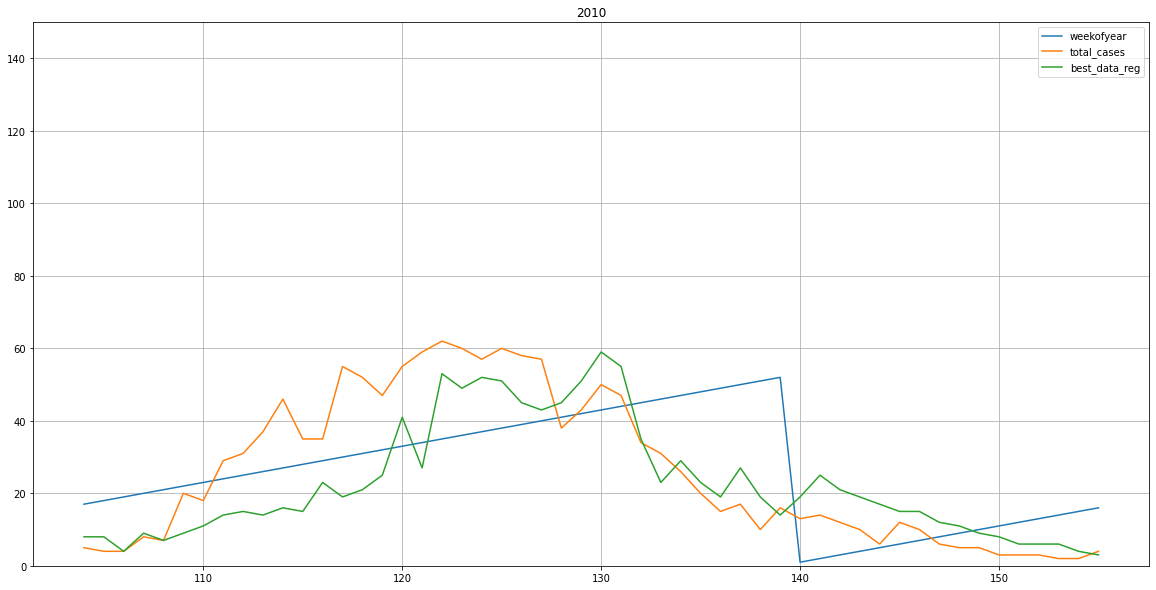

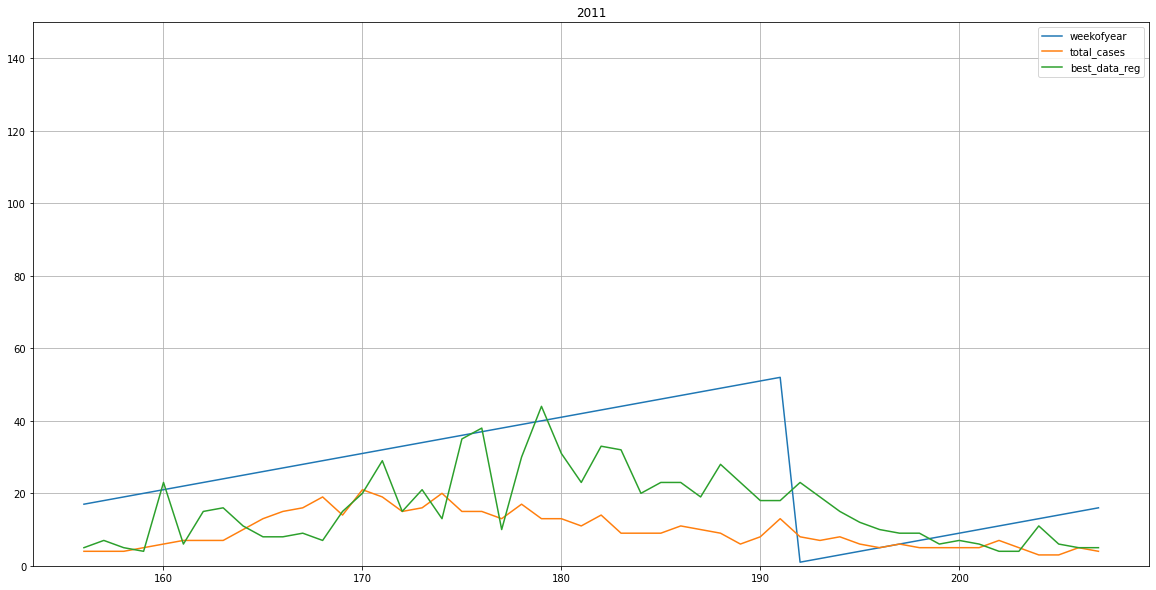

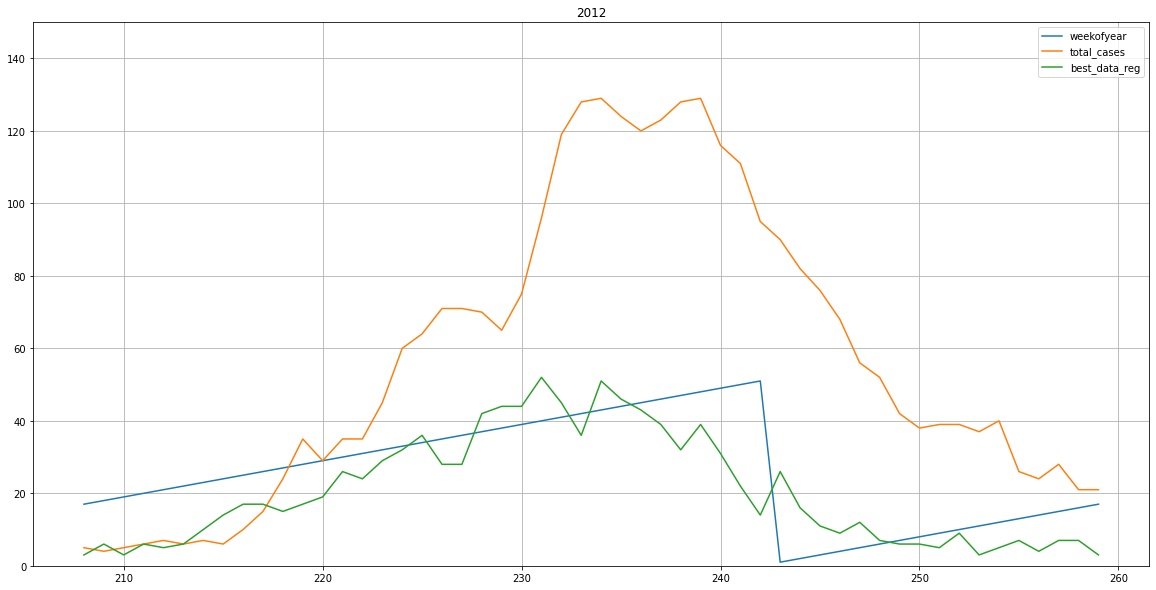

In [27]:
for i in range(2008, 2013):
    start_index = (i-2008)*52
    data = new_data[start_index:(start_index+52)]
    ax = data[data['city'] == 'sj'].plot(figsize=(20,10), grid=True)
    ax.set_title(i)
    ax.set_ylim(0,150)

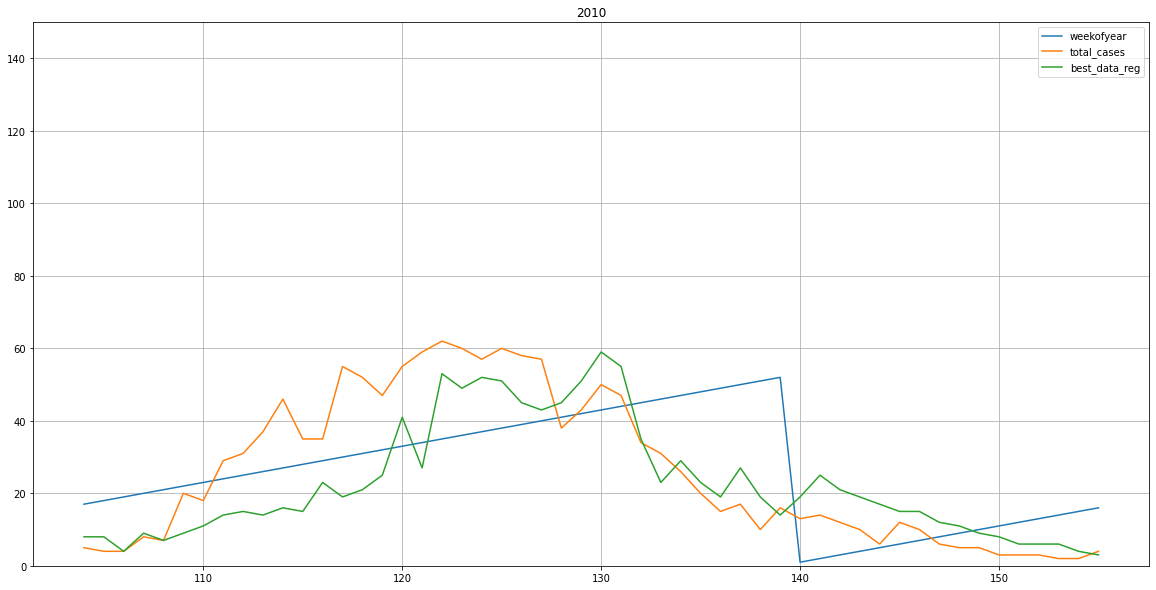

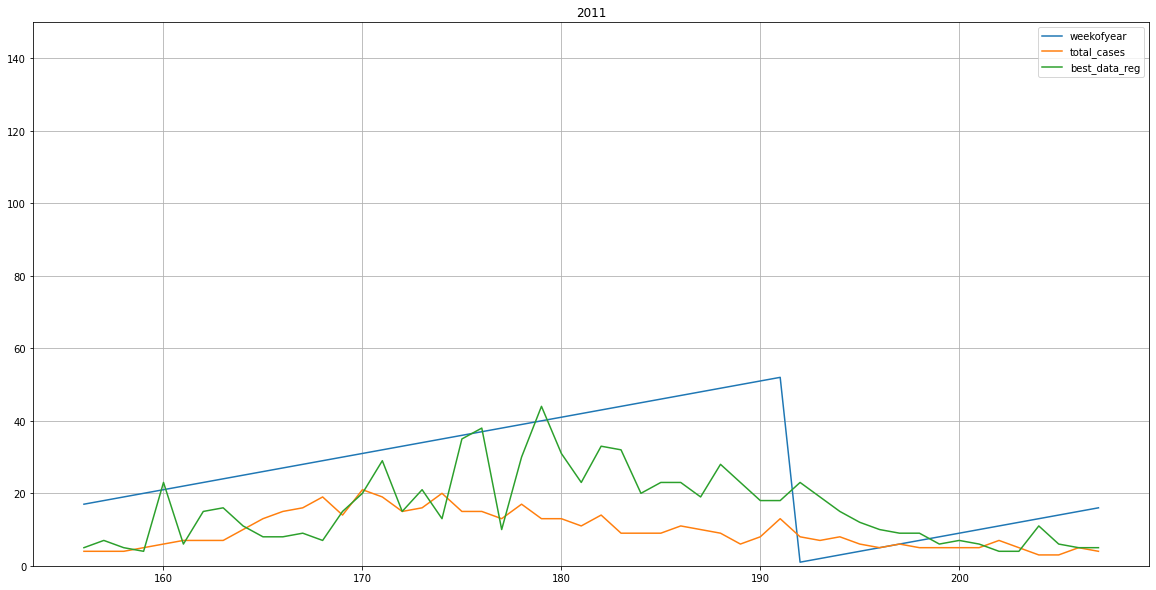

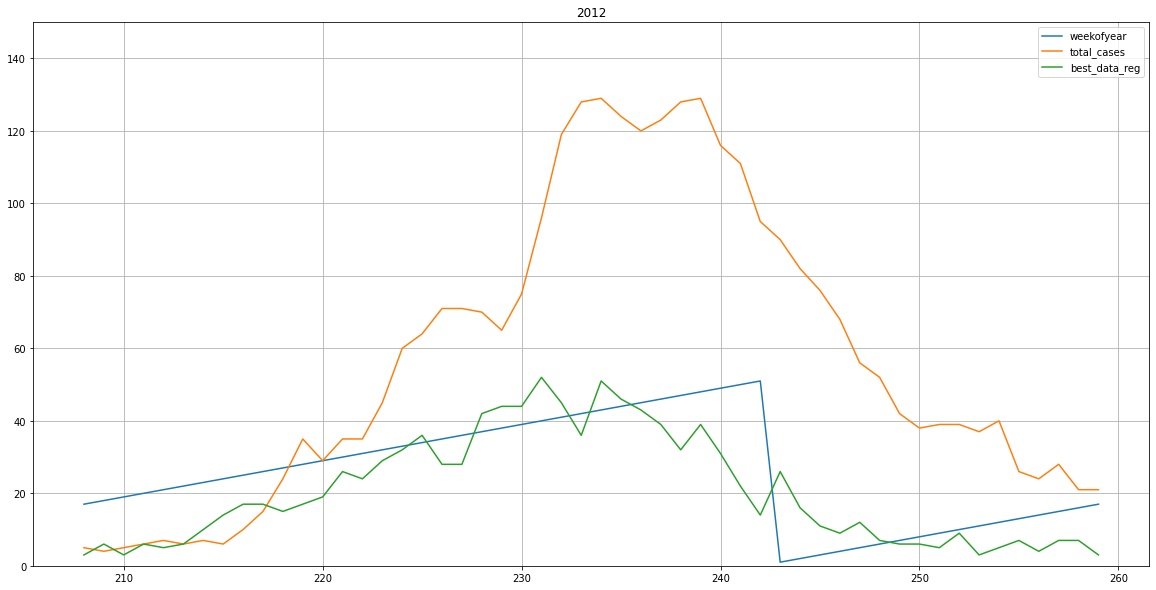

In [28]:
for i in range(2010, 2013):
    start_index = (i-2008)*52
    data = new_data[new_data['city'] == 'iq']
    data = new_data[start_index:(start_index+52)]
    ax = data.plot(figsize=(20,10), grid=True)
    ax.set_title(i)
    ax.set_ylim(0,150)

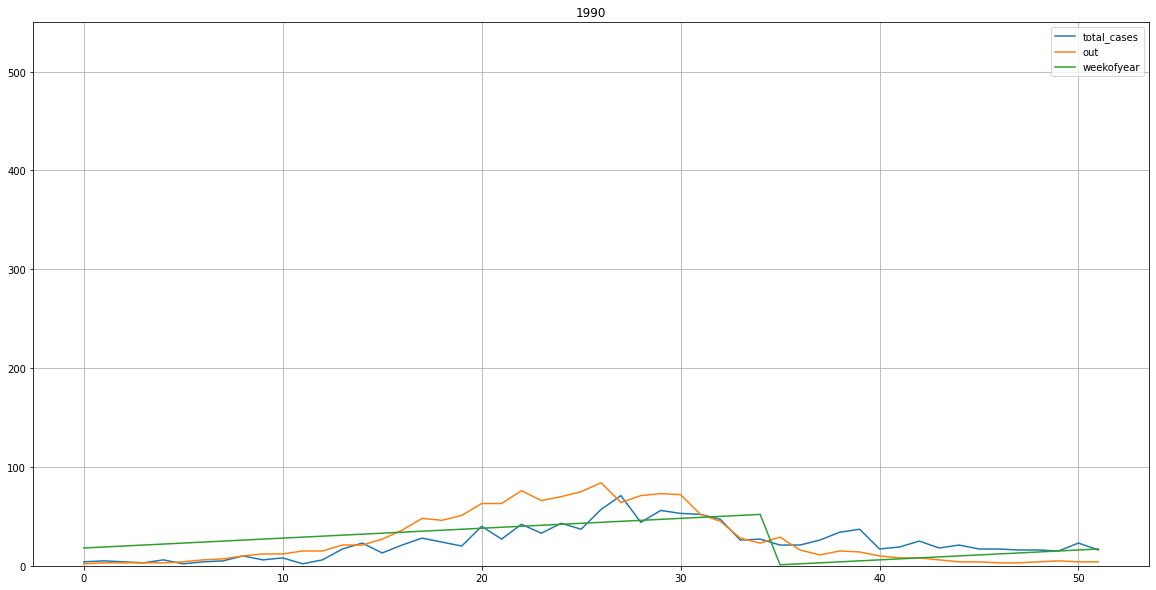

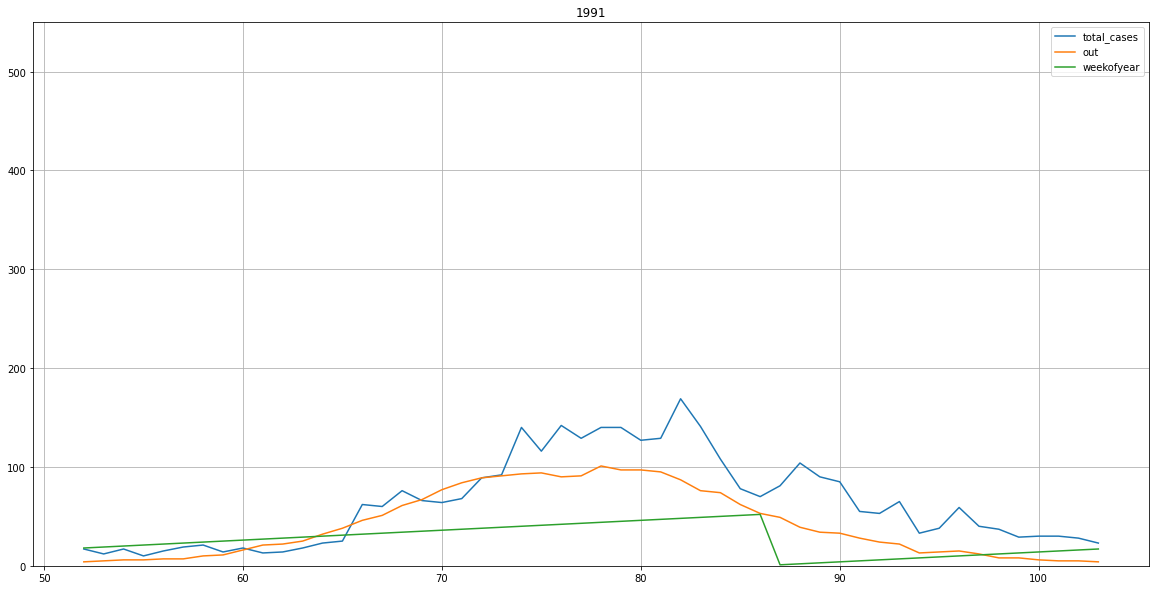

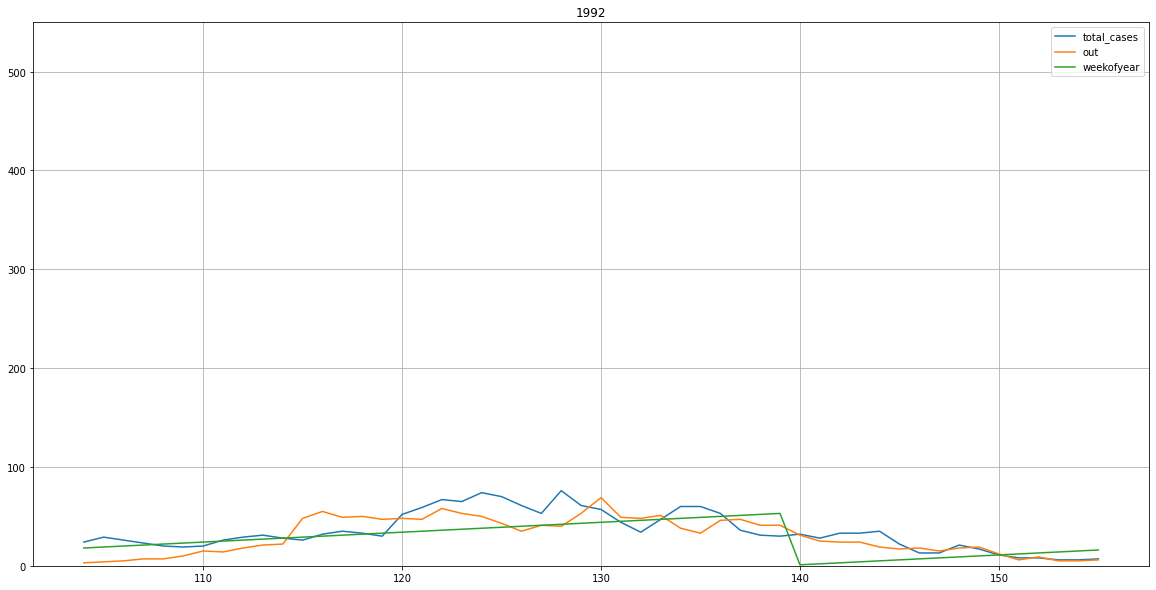

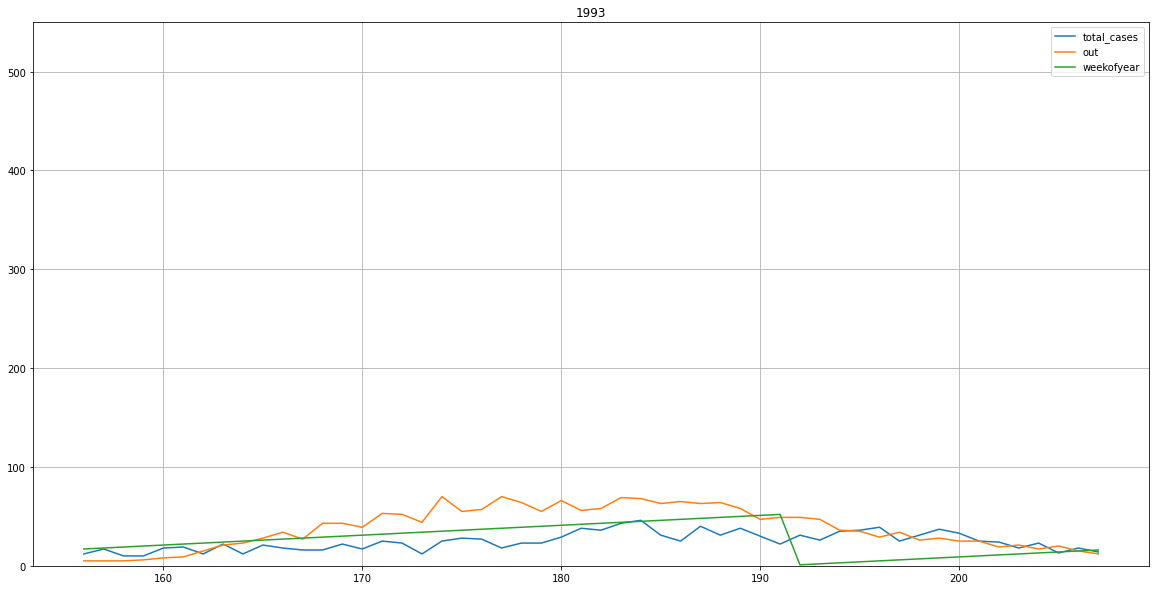

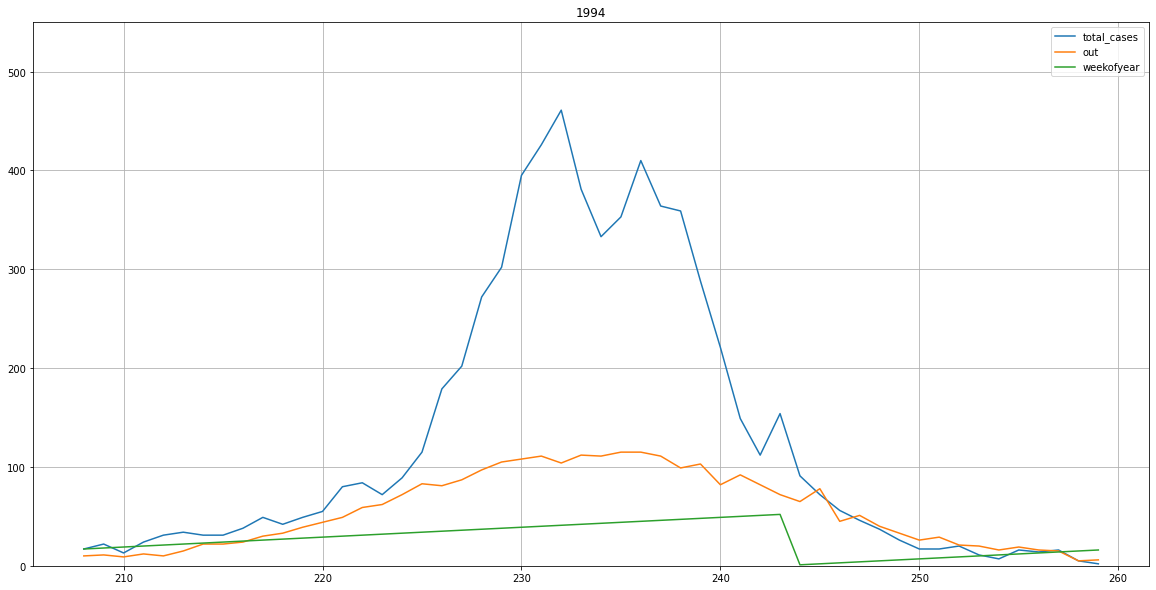

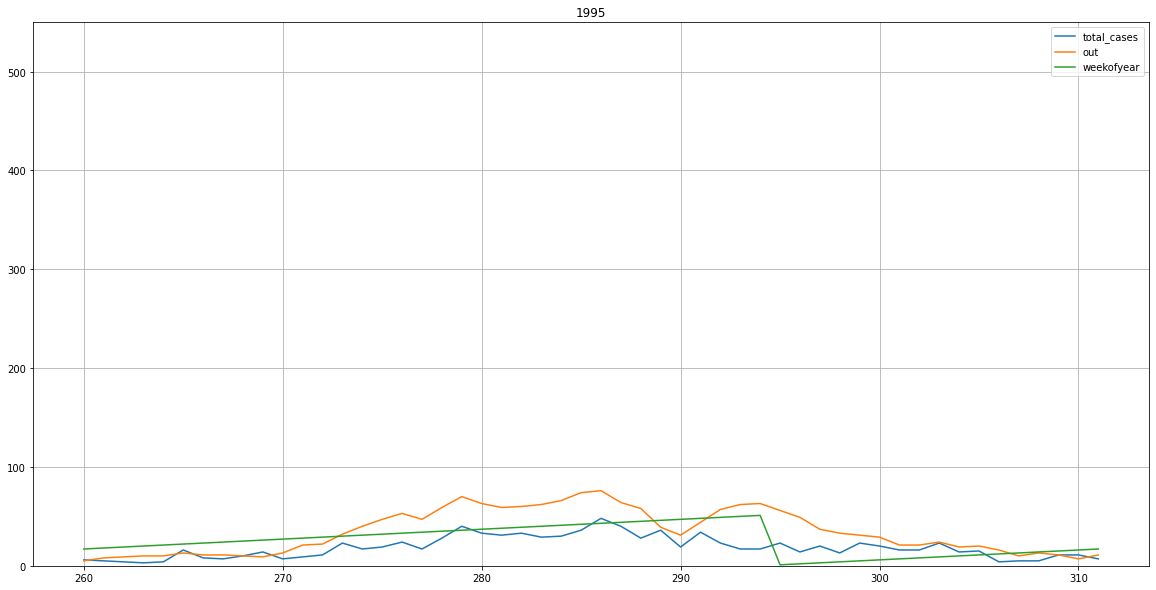

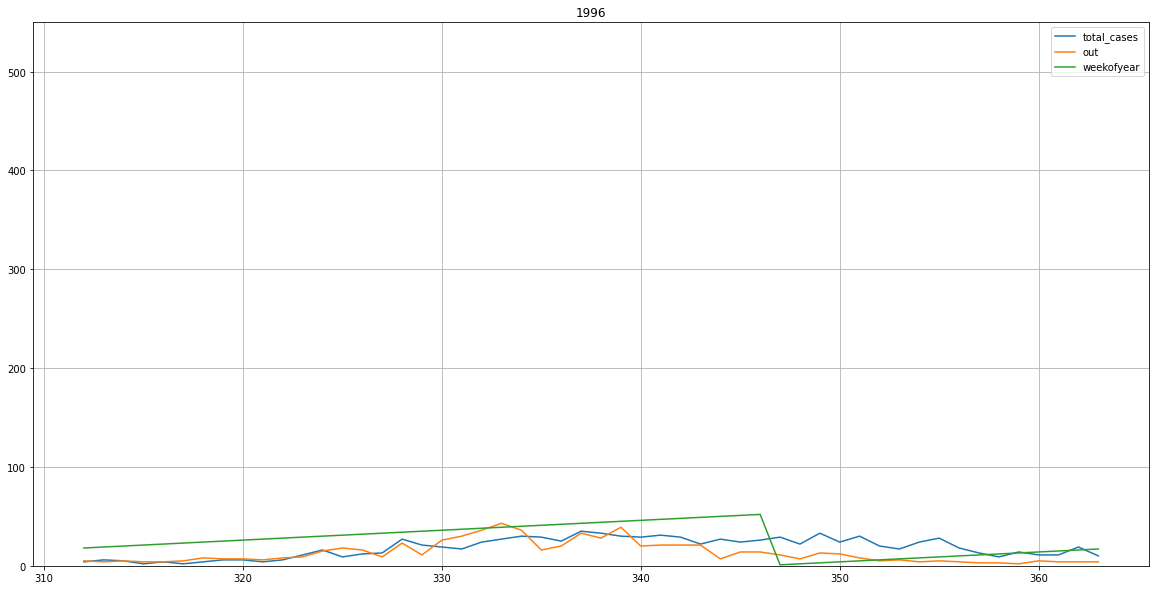

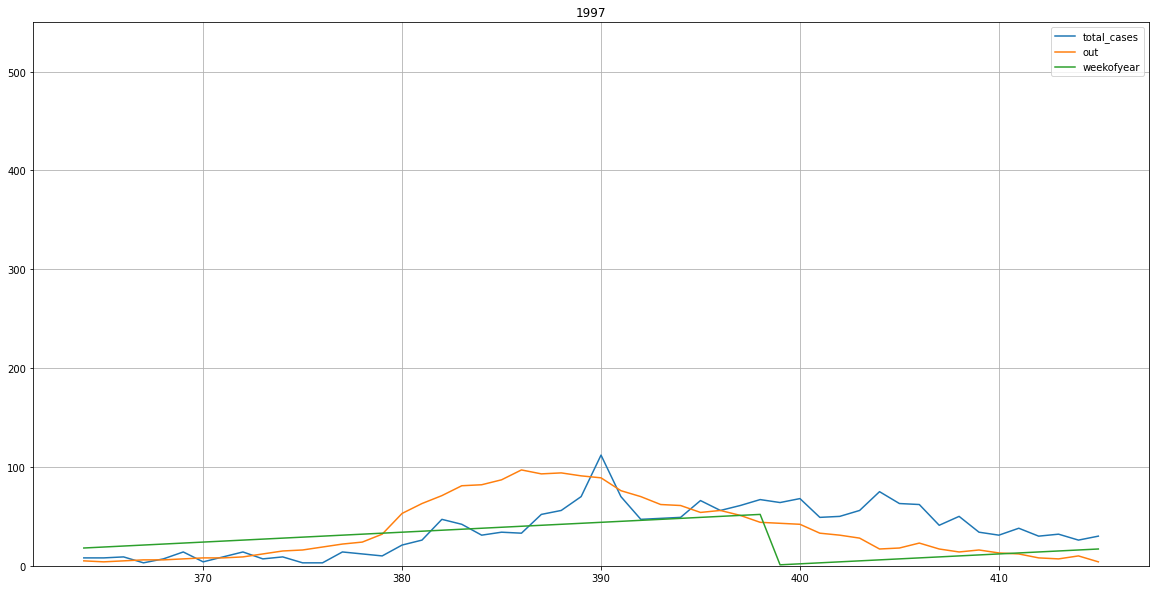

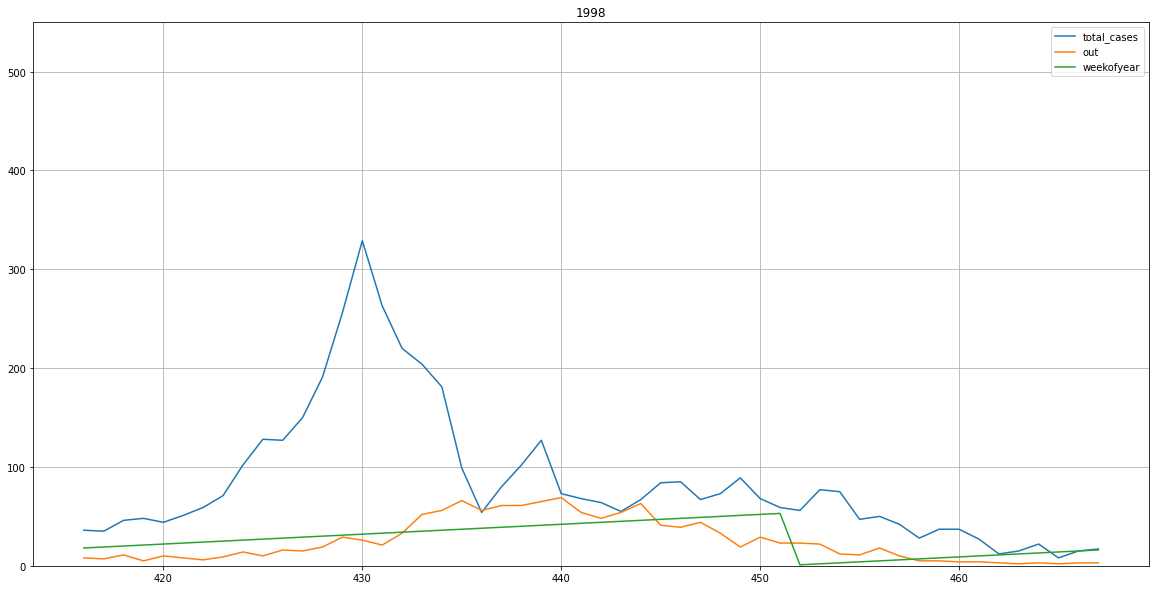

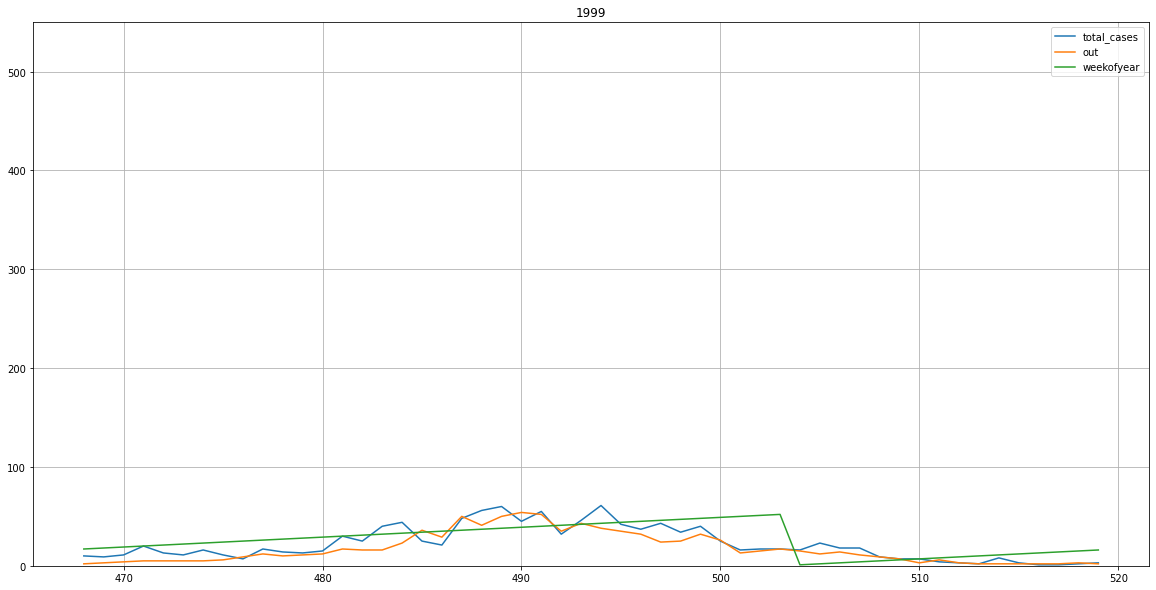

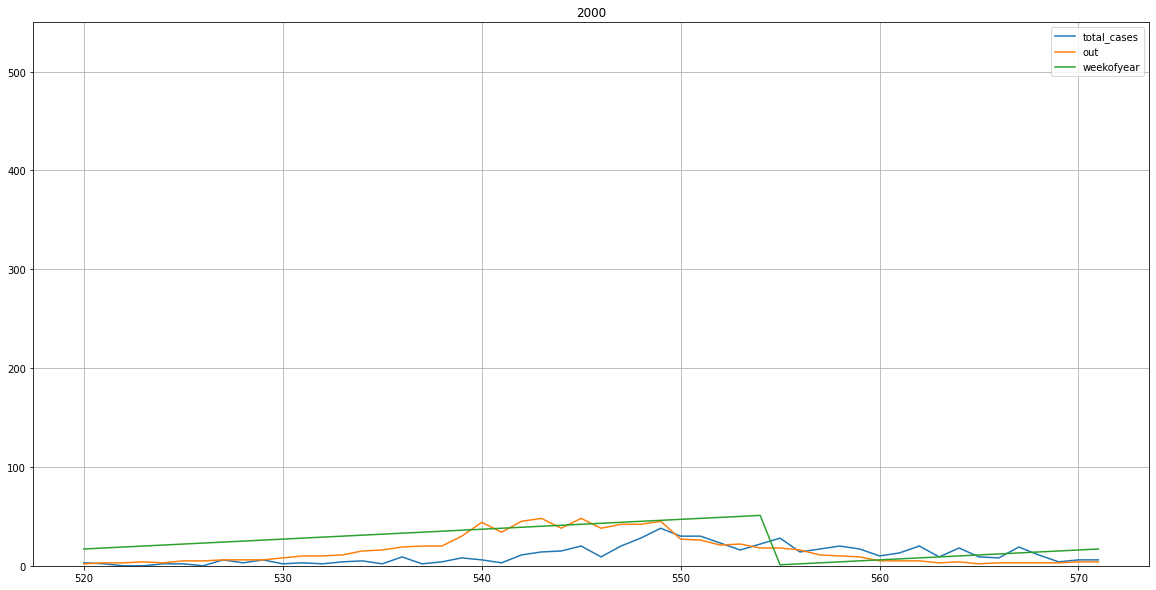

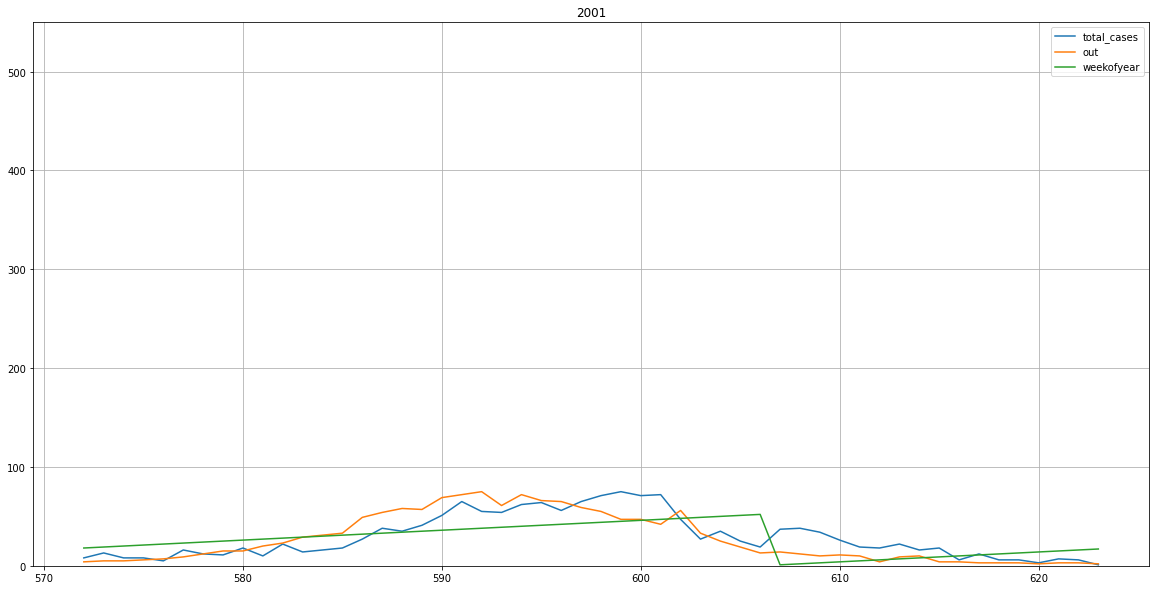

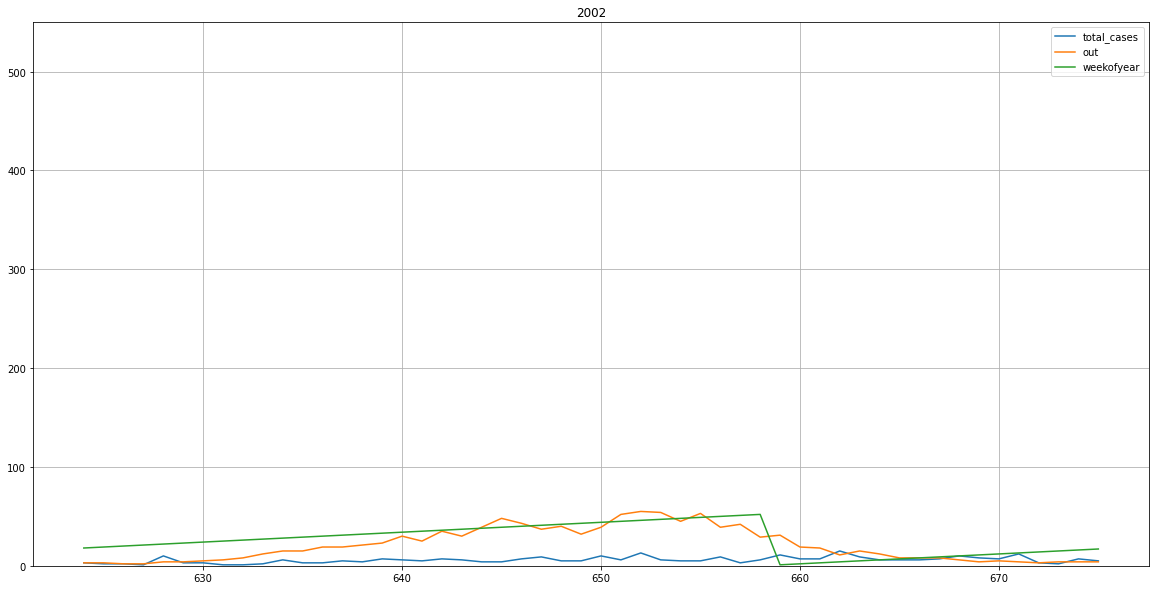

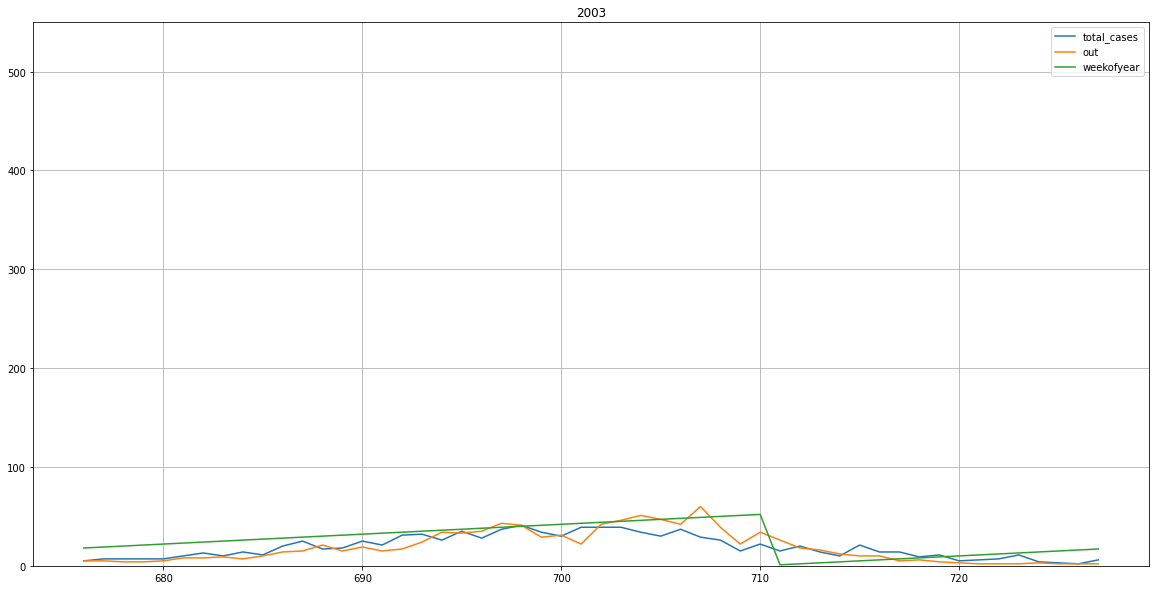

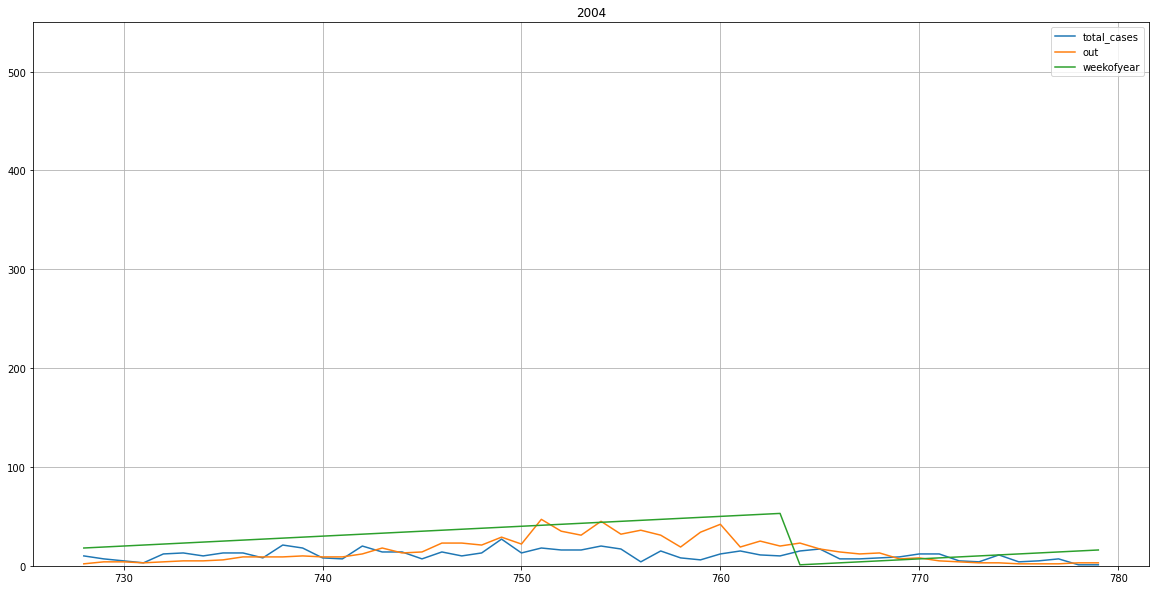

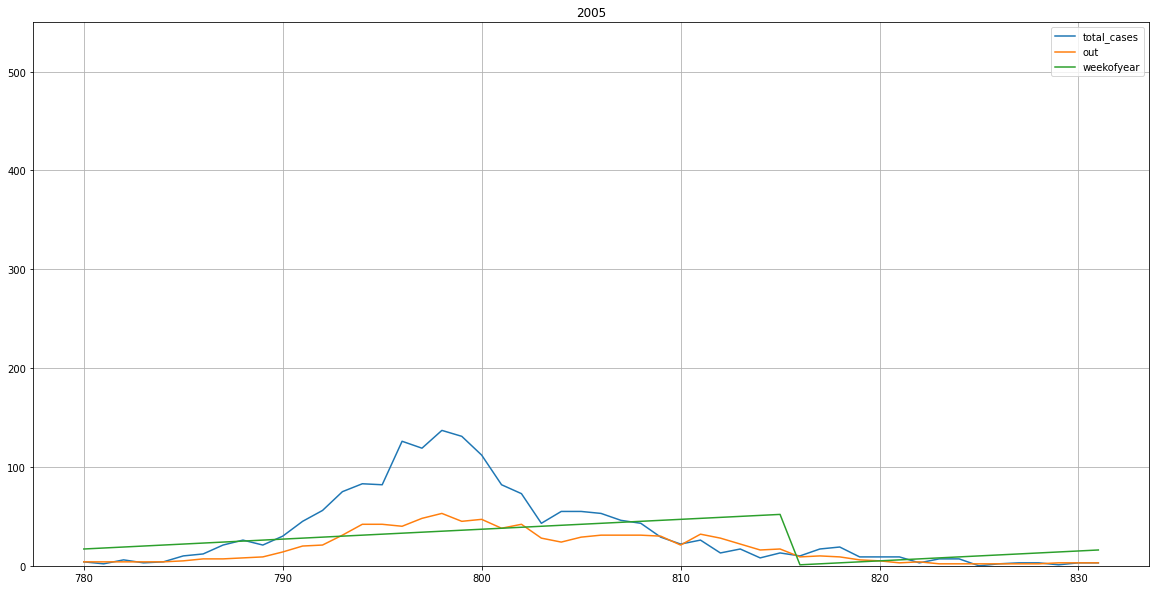

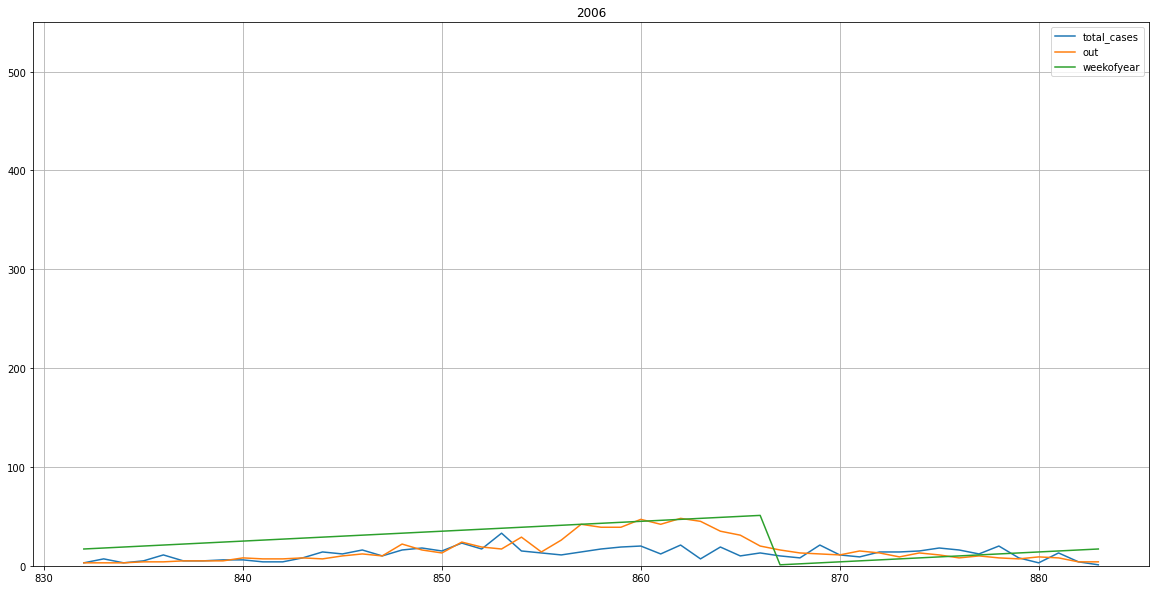

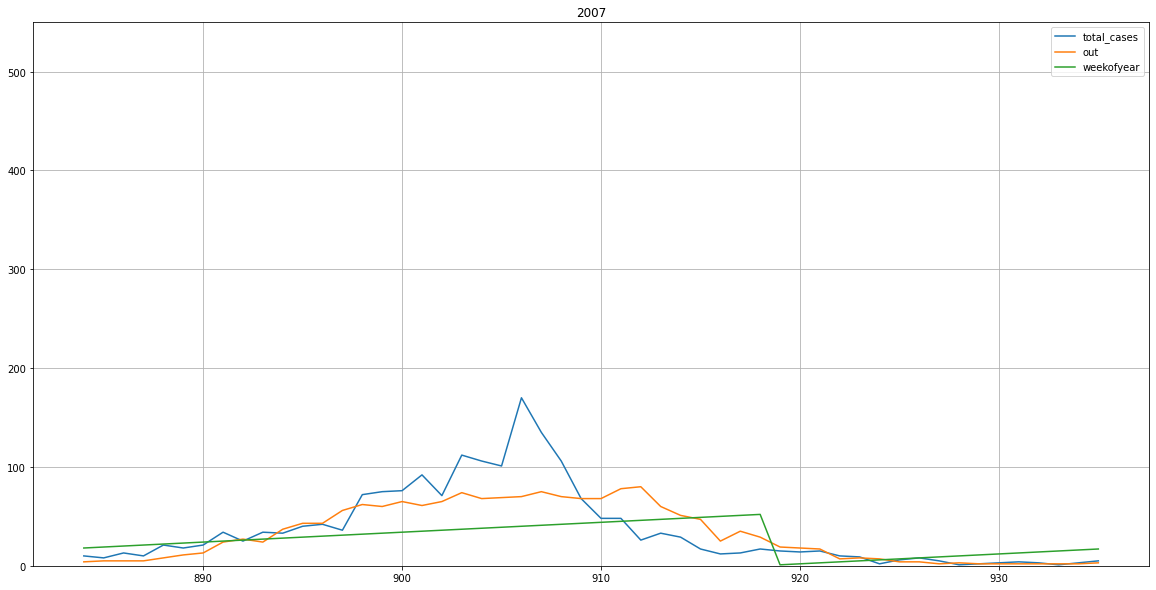

In [32]:
train_data['out'] = train_data_out['total_cases']
sj_data = train_data[train_data['city'] == 'sj'][['total_cases', 'out', 'weekofyear']]
for i in range(1990, 2008):
    start_index = (i-1990)*52
    data = sj_data[start_index:(start_index+52)]
    ax = data.plot(figsize=(20,10), grid=True)
    ax.set_title(i)
    ax.set_ylim(0,550)

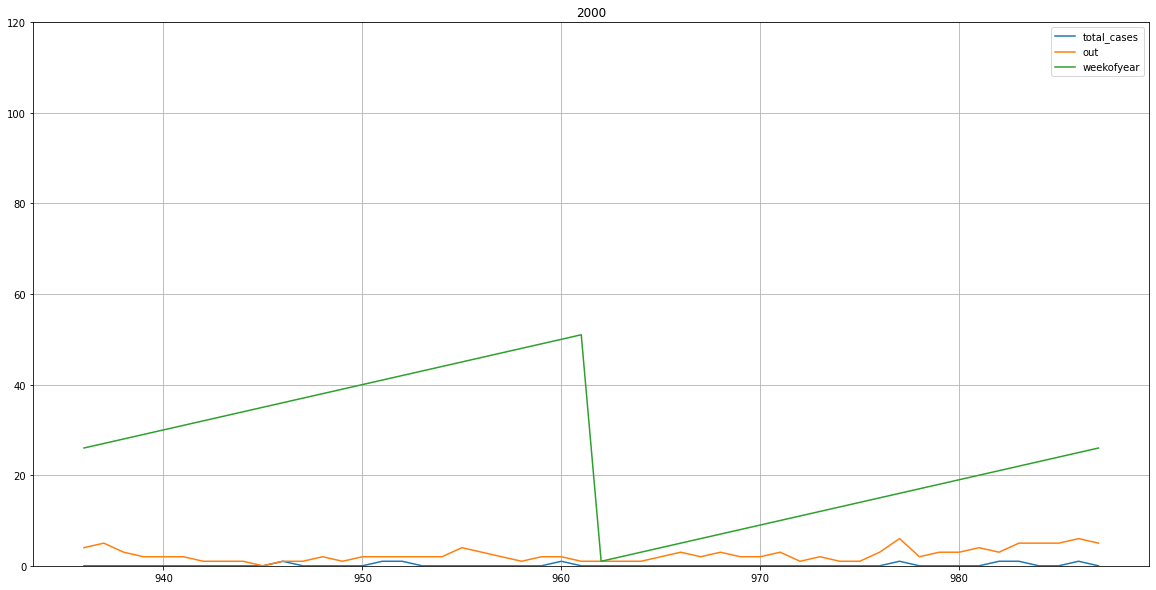

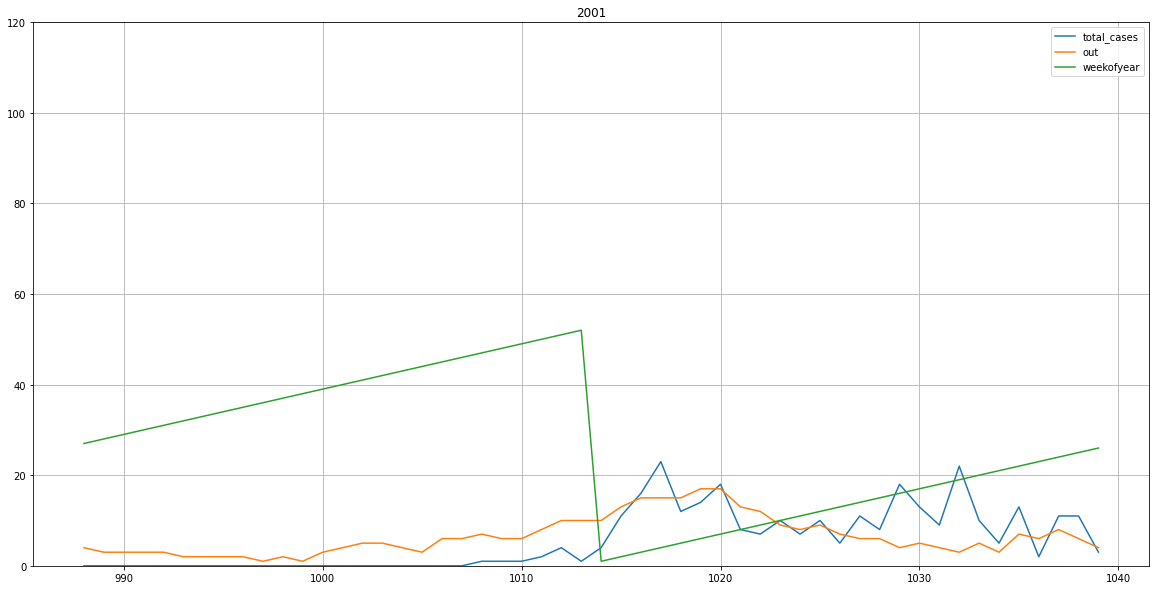

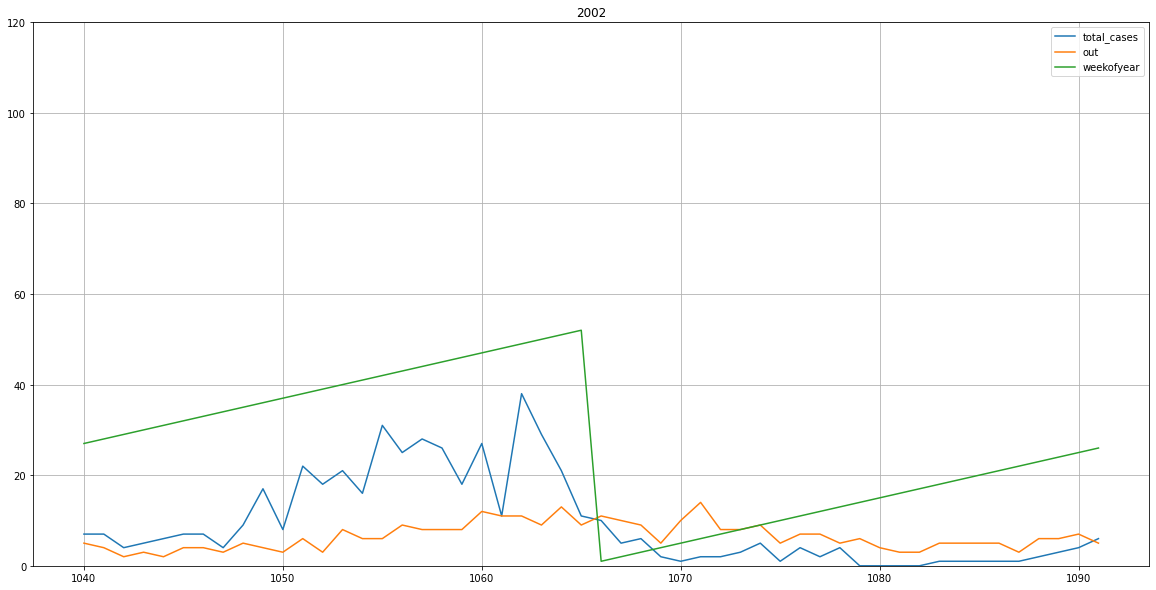

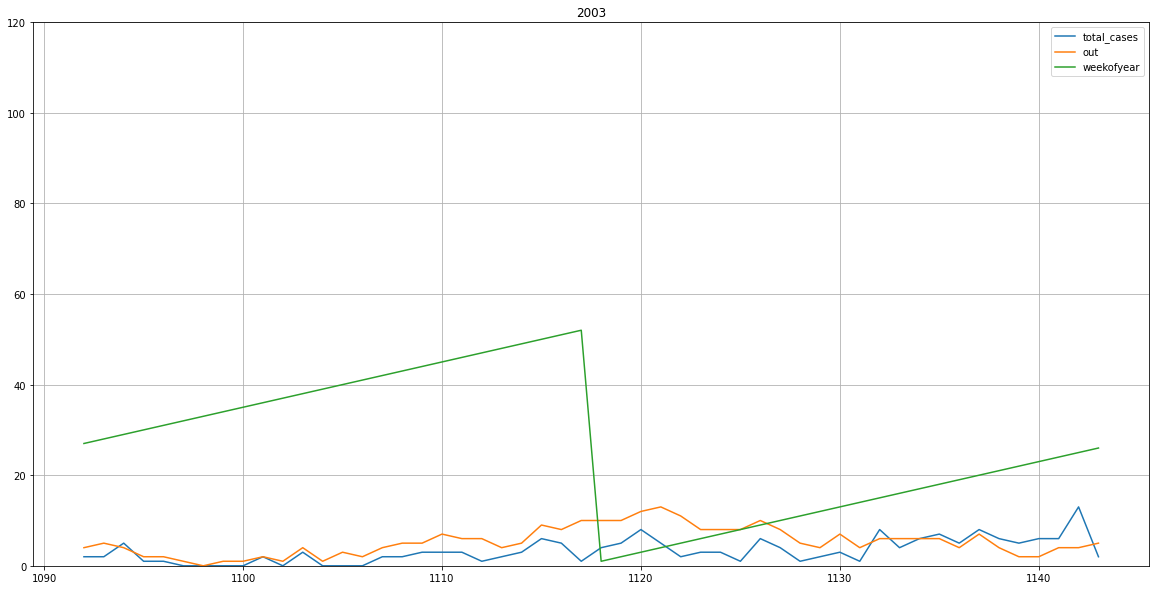

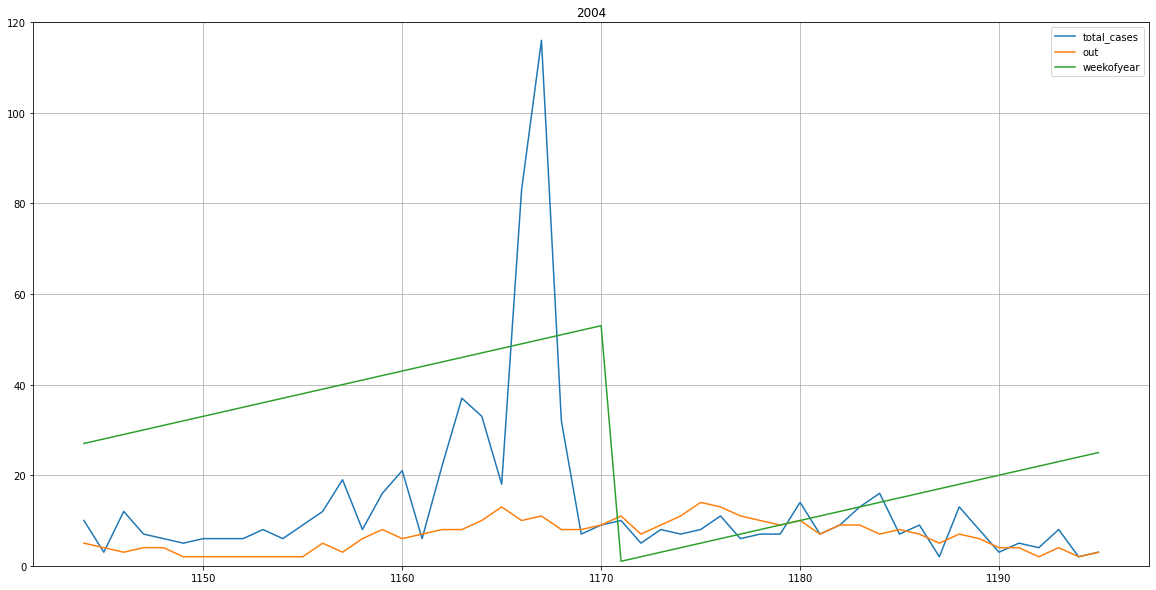

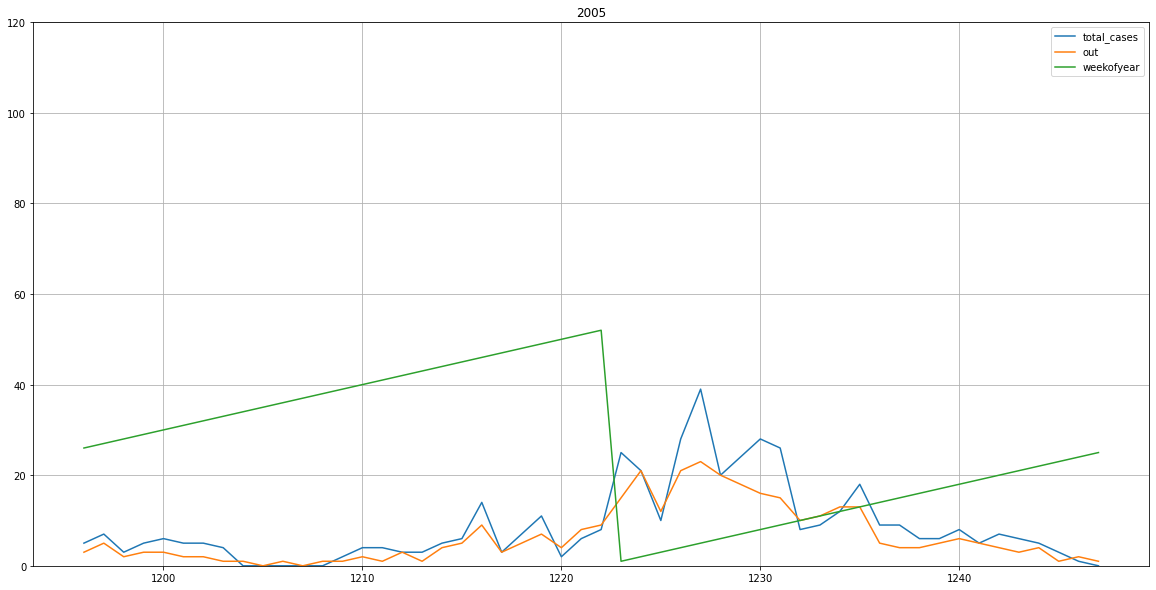

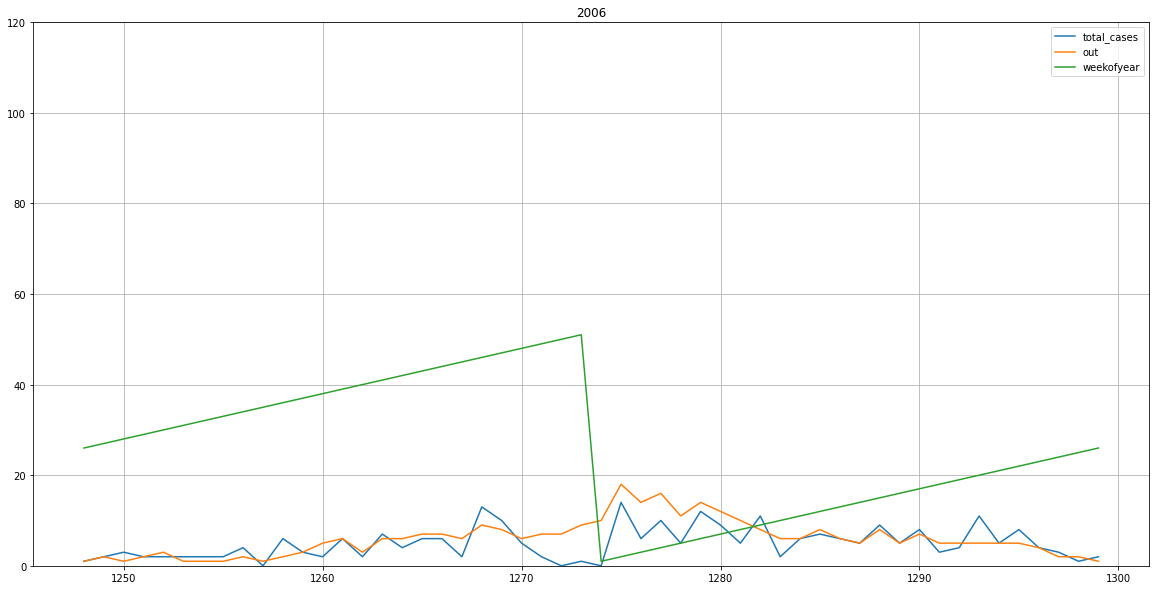

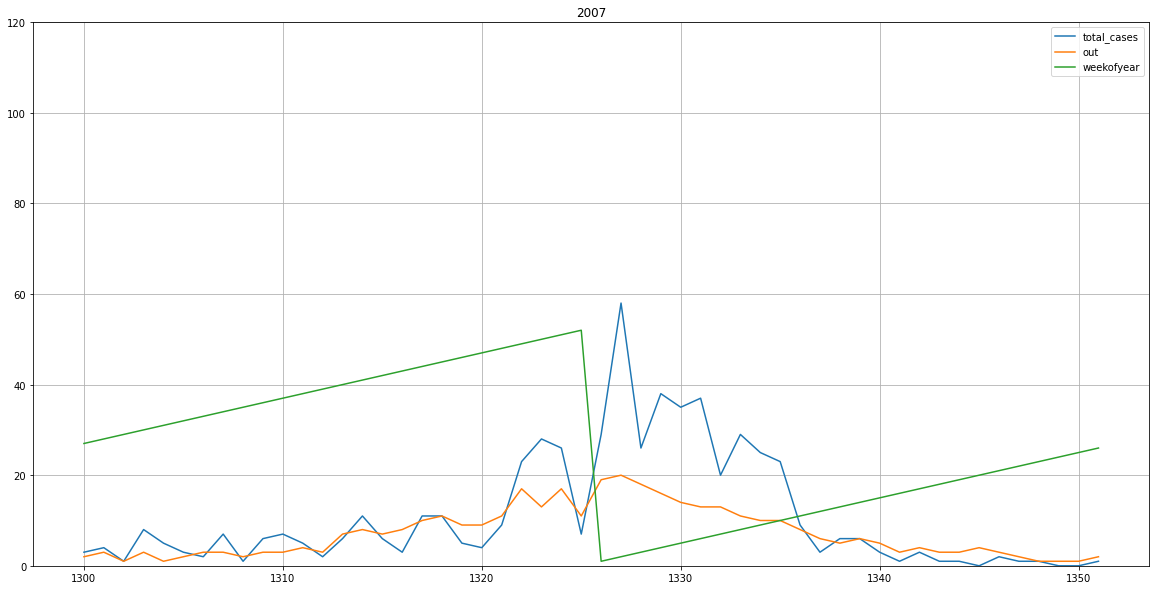

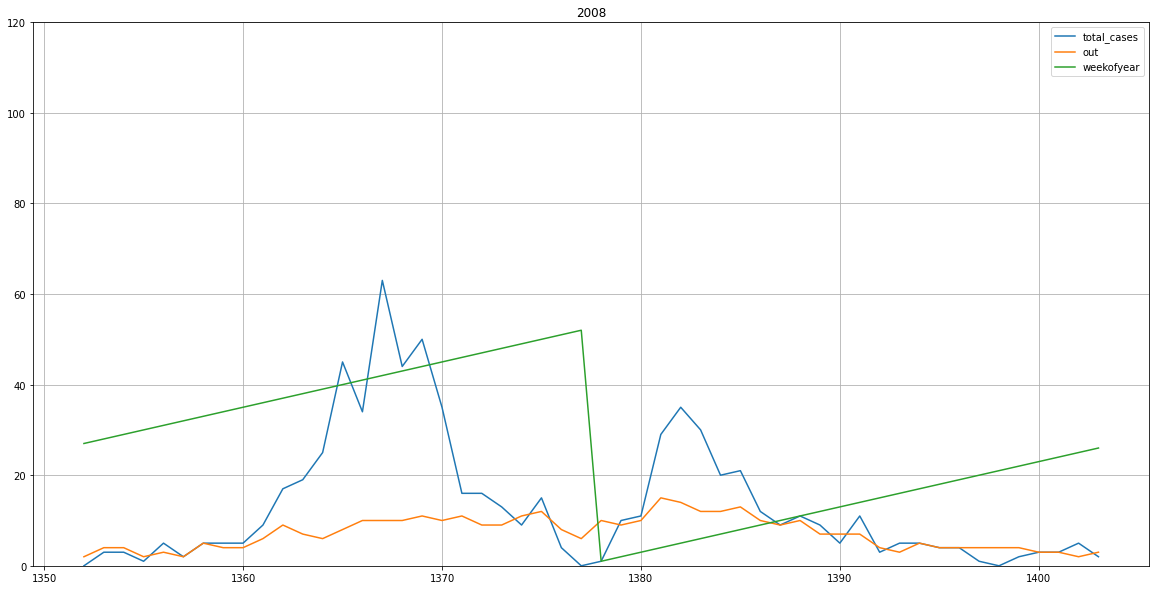

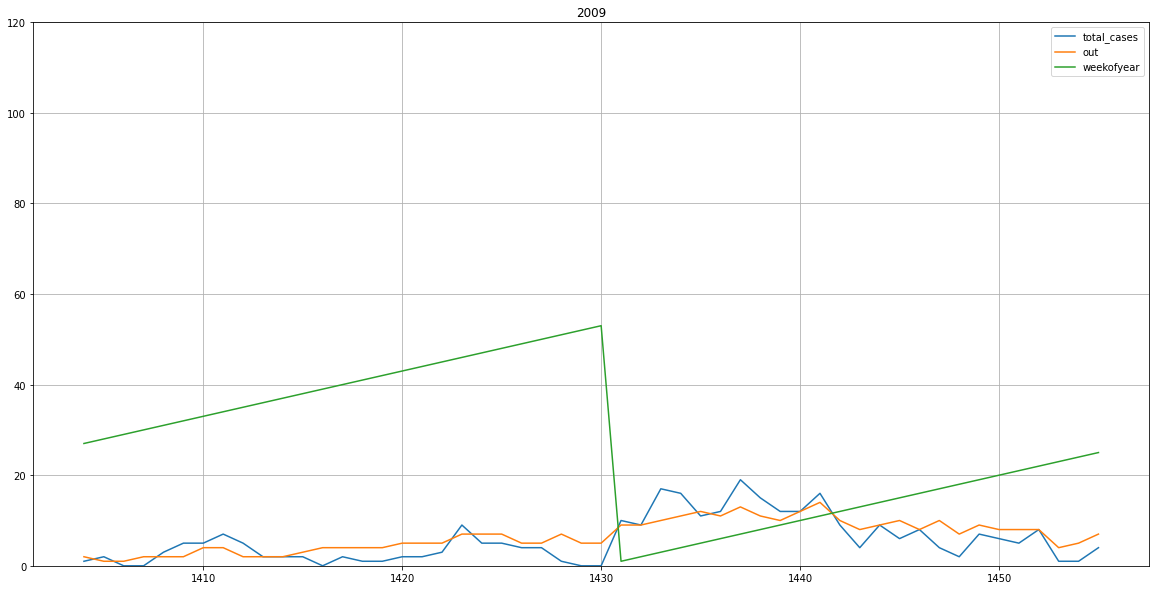

In [33]:
iq_data = train_data[train_data['city'] == 'iq'][['total_cases', 'out', 'weekofyear']]

for i in range(2000, 2010):
    start_index = (i-2000)*52
    data = iq_data[start_index:(start_index+52)]
    ax = data.plot(figsize=(20,10), grid=True)
    ax.set_title(i)
    ax.set_ylim(0,120)

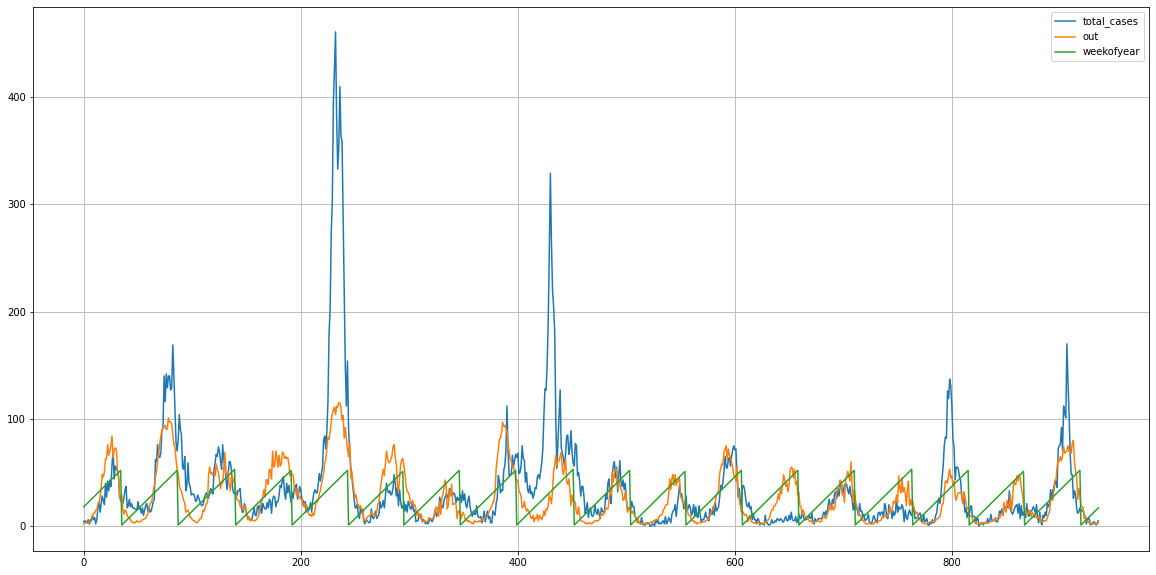

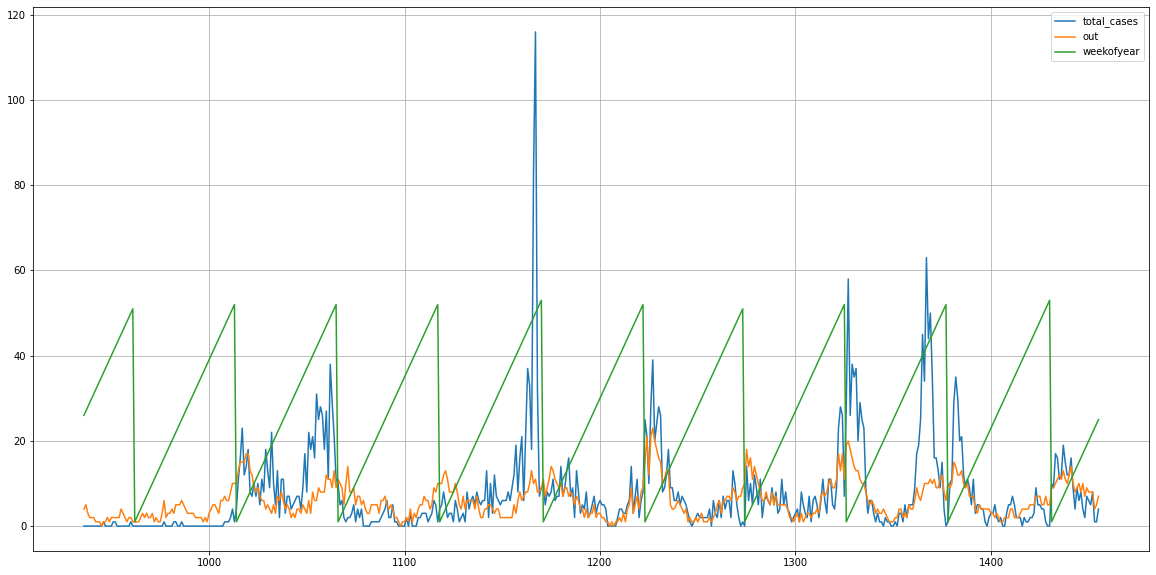

In [35]:
train_data[train_data['city'] == 'sj'][['total_cases', 'out', 'weekofyear']].plot(figsize=(20,10), grid=True)
train_data[train_data['city'] == 'iq'][['total_cases', 'out', 'weekofyear']].plot(figsize=(20,10), grid=True)

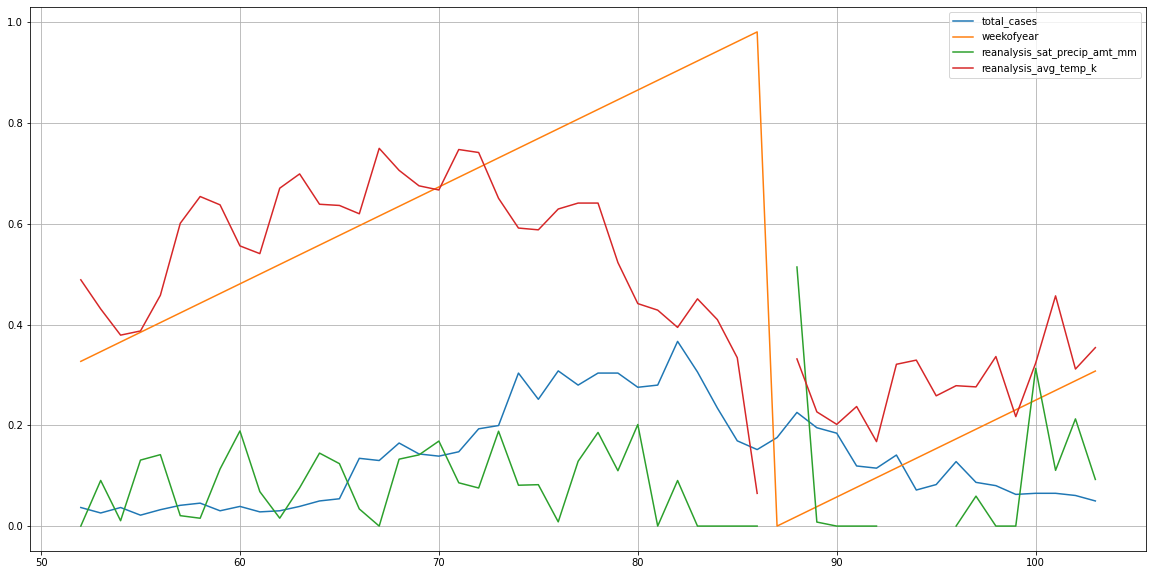

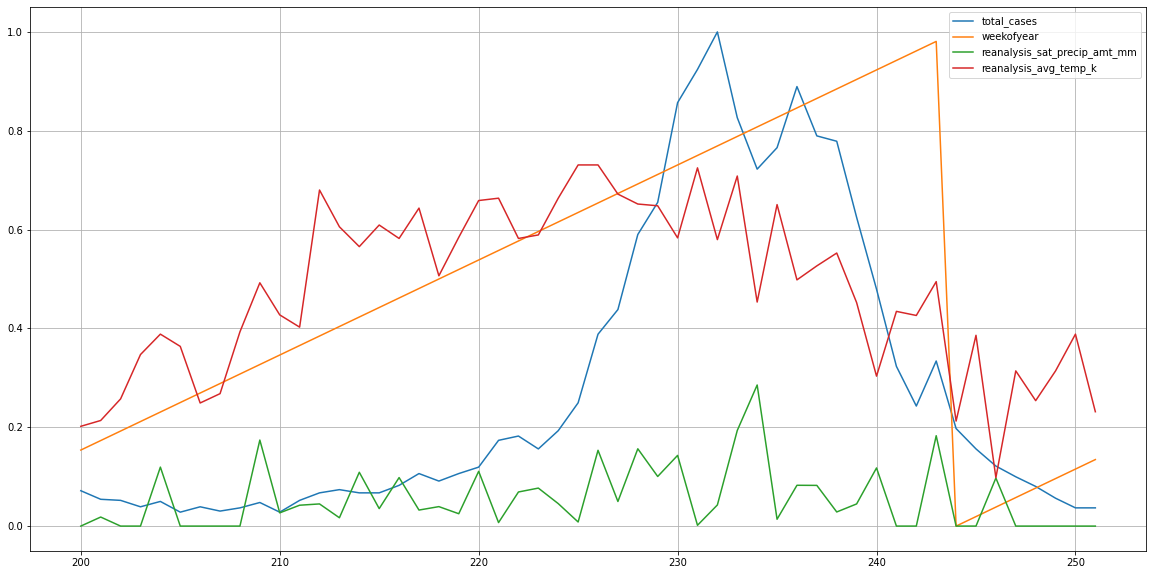

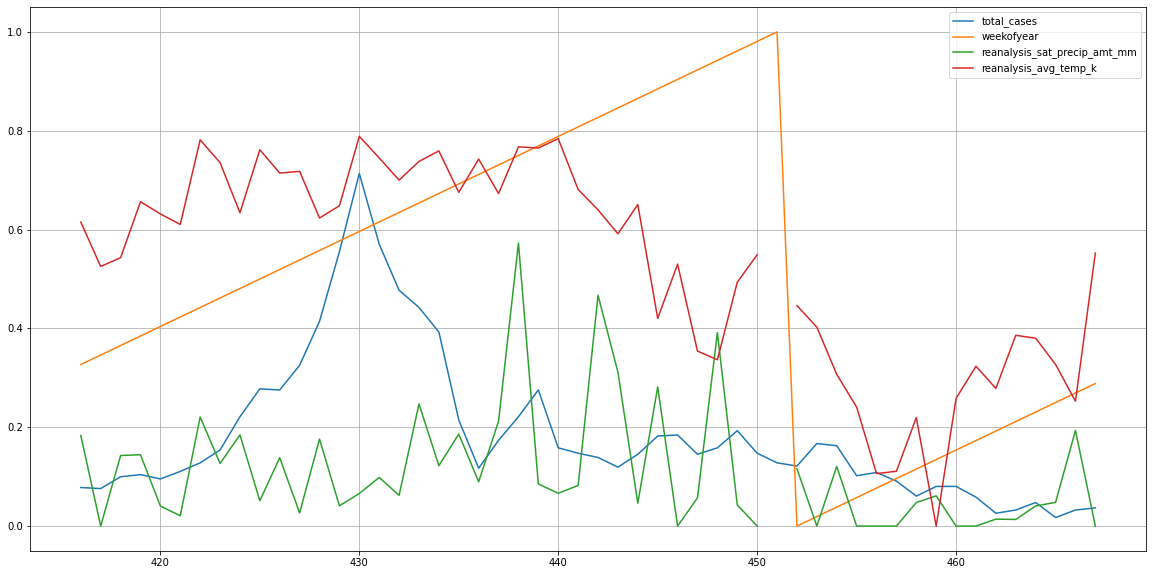

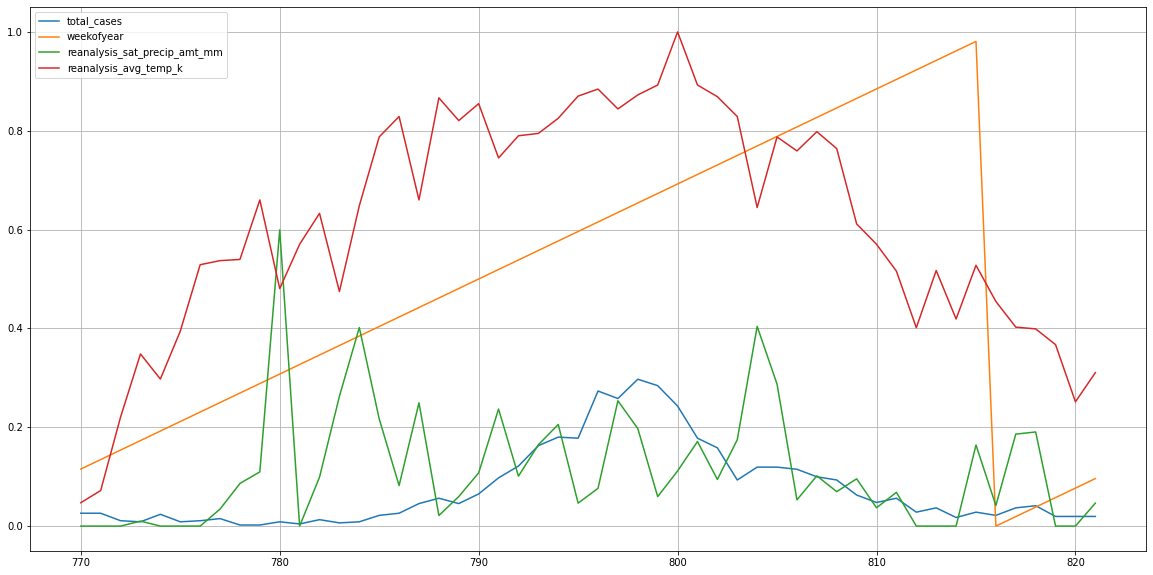

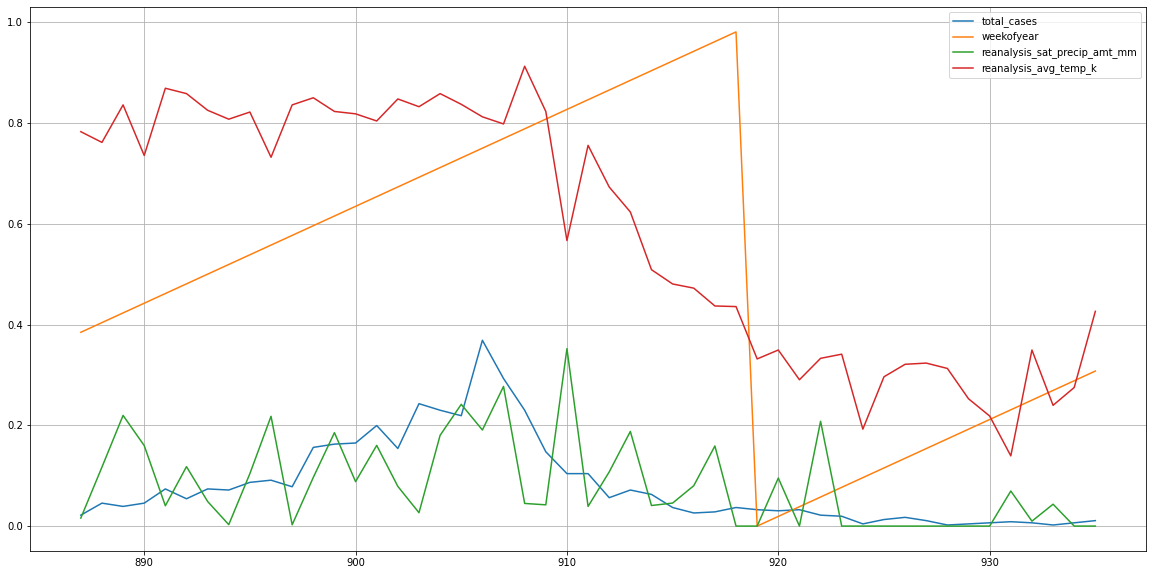

In [49]:
new_cols = ['total_cases', 'weekofyear', 
#             'station_precip_mm', 'precipitation_amt_mm', 
            'reanalysis_sat_precip_amt_mm', 'reanalysis_avg_temp_k'
           ]
x = train_data[train_data['city'] == 'sj'][new_cols].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.columns = new_cols
df[52:104].plot(figsize=(20,10), grid=True)
df[200:252].plot(figsize=(20,10), grid=True)
df[416:468].plot(figsize=(20,10), grid=True)
df[770:822].plot(figsize=(20,10), grid=True)
df[887:952].plot(figsize=(20,10), grid=True)

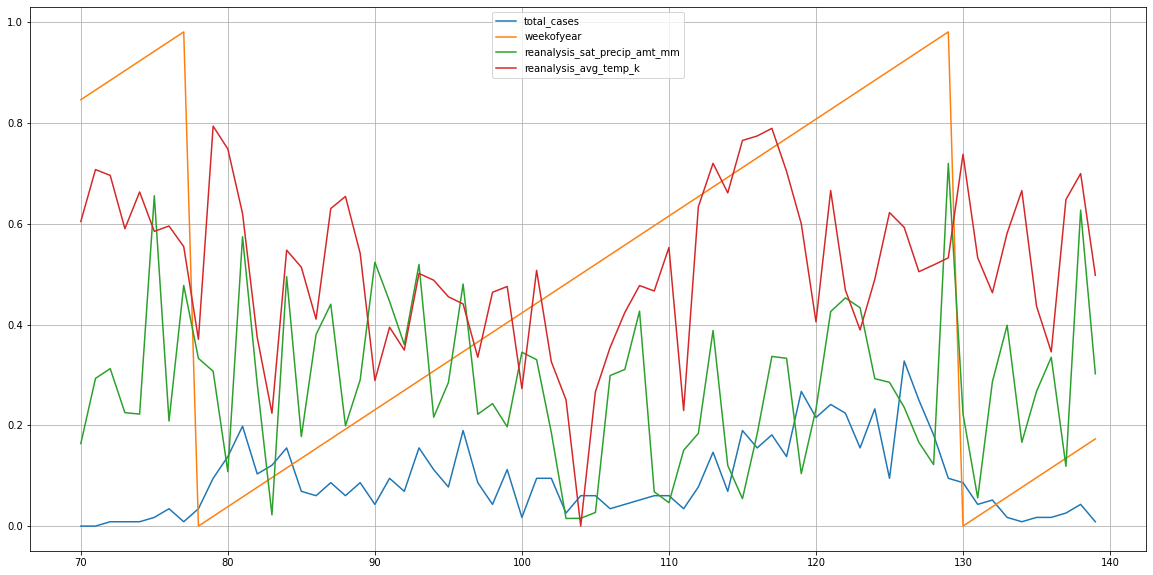

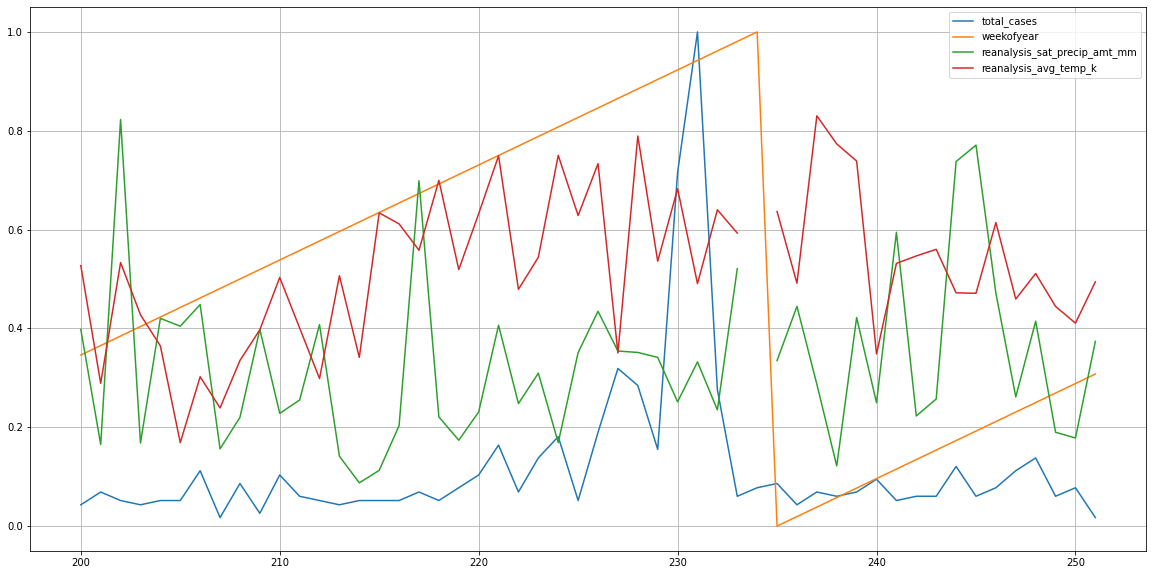

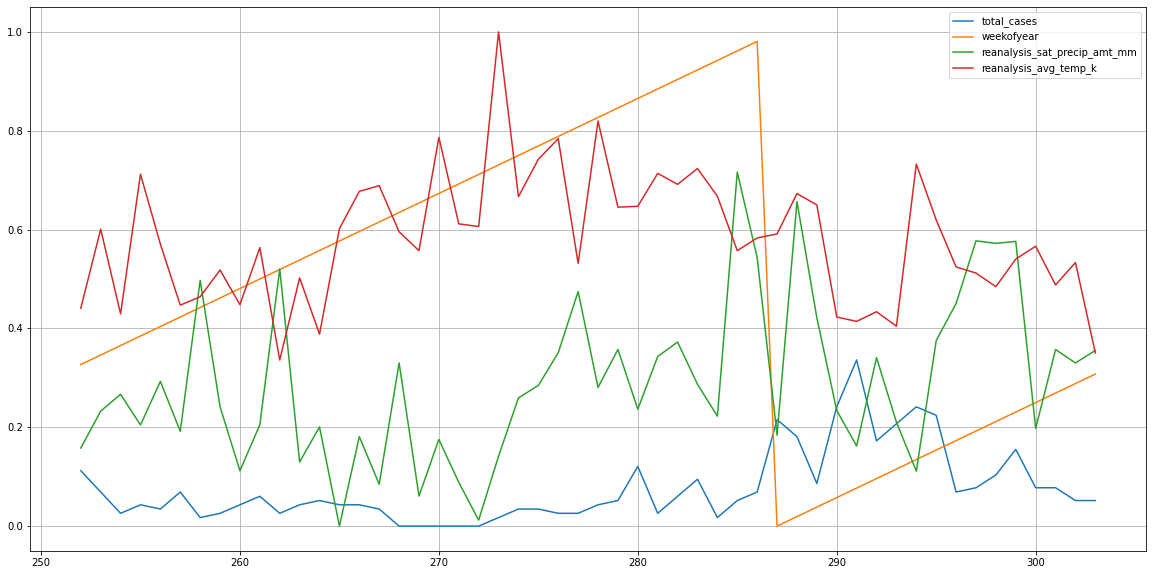

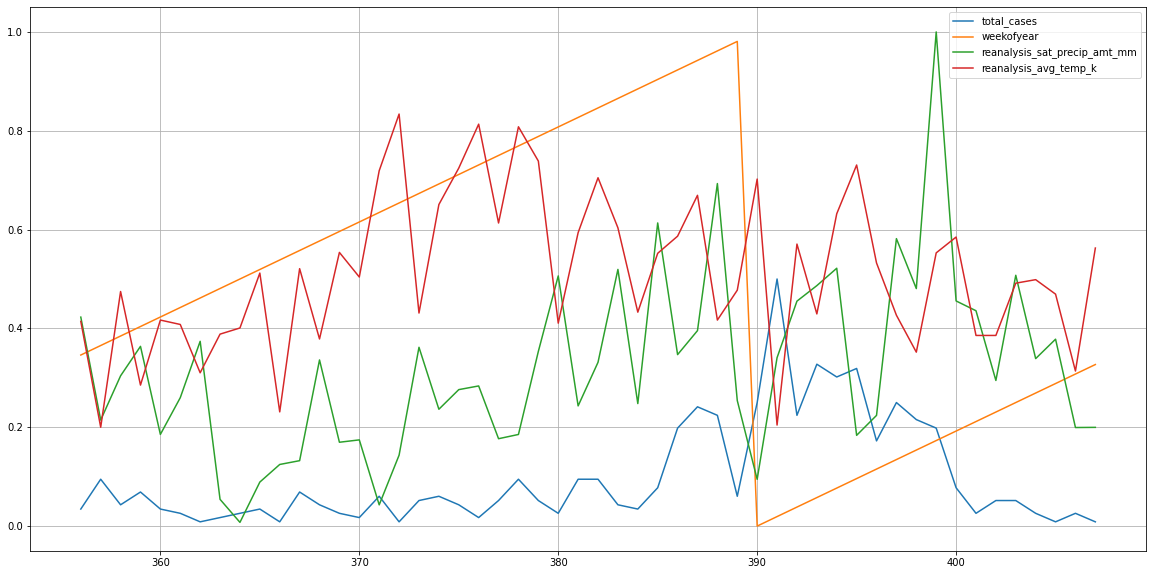

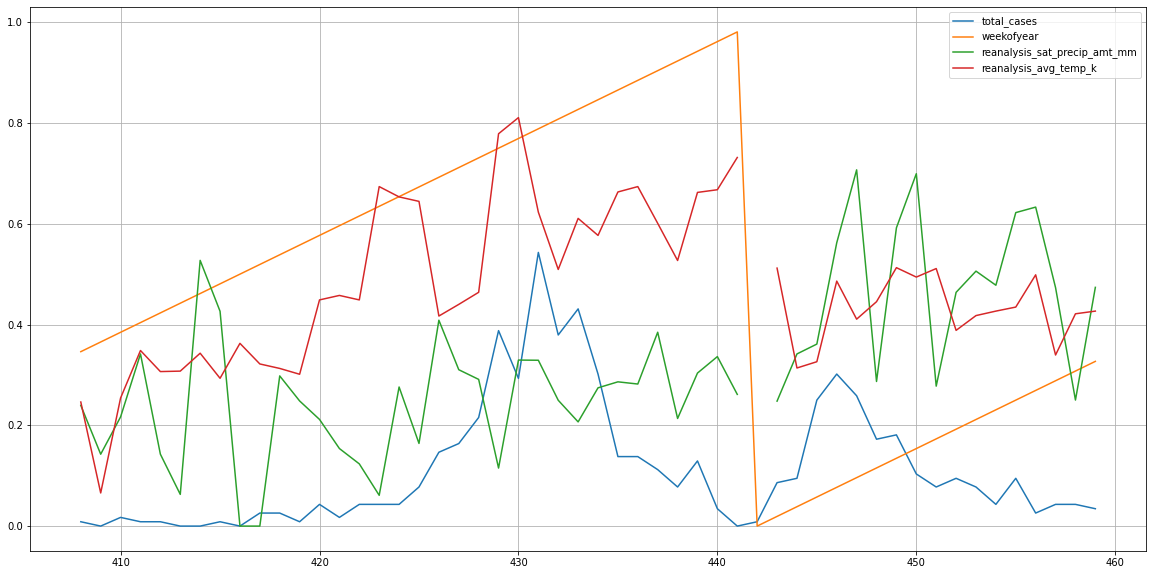

In [50]:
x = train_data[train_data['city'] == 'iq'][new_cols].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.columns = new_cols
df[70:140].plot(figsize=(20,10), grid=True)
df[200:252].plot(figsize=(20,10), grid=True)
df[252:304].plot(figsize=(20,10), grid=True)
df[356:408].plot(figsize=(20,10), grid=True)
df[408:460].plot(figsize=(20,10), grid=True)